<img src='https://storage.googleapis.com/kaggle-datasets-images/228/482/a520351269b547c89afe790820a1087e/dataset-cover.jpeg'>
* ref : kaggle  : https://www.kaggle.com/uciml/pima-indians-diabetes-database
    
    

## Pima Indians Diabetes Database
* Predict the onset of diabetes based on diagnostic measures
* UCI Machine Learning - updated 5 years ago (Version 1)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score
from sklearn.preprocessing import Binarizer

import warnings
warnings.filterwarnings(action='ignore')

sns.set()

# 데이터 로드

In [2]:
df = pd.read_csv("./diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


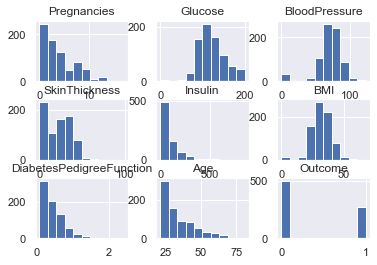

In [6]:
sns.set()
df.hist()
plt.show()

# 우선 점수부터 보자
---------------------------------------
* 1. str X  
* 2. nan

In [7]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
#----------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1414,shuffle=False)
#----------------------------------------------------------------------------------------------
model = RandomForestClassifier(n_estimators=500,random_state=1414)  #0.7597402597402597
#----------------------------------------------------------------------------------------------
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred))

0.7597402597402597
0.6262626262626263


# 공통함수 

In [8]:
def my_eval_chart(y_val, proba): 
    # --------------- 양성 평가를 위한 차트 : precision_recall_curv() -------------------    
    # plot_precision_recall_curve(model, 문제지2, 정답지2)
    precisions, recalls, ths = precision_recall_curve(y_val, proba[:, 1])
    plt.title("precision recall curv %0.4f"% f1)
    # plt.title(f"precision recall curv %0.4f" % f1)
    plt.xlabel("threadhold")
    plt.ylabel("value")
    plt.plot(ths, precisions[:ths.shape[0]], "b", label="precision")
    plt.plot(ths, recalls[:ths.shape[0]], "r", linestyle='--', label="recall")
    plt.grid()
    plt.legend()
    plt.show()

    # --------------- 양성 평가를 위한 차트 : roc_auc_score(), roc_curve() -------------------
    auc_score = roc_auc_score(y_val, proba[:, 1])

    fprs, tprs, ths = roc_curve(y_val, proba[:, 1])
    plt.title("roc curv %0.4f" % auc_score)
    # plt.title(f"precision recall curv %0.4f" % f1)
    plt.xlabel("FPR(1-specificity)")
    plt.ylabel("TPR")
    plt.grid()
    plt.plot(fprs, tprs, "b")
    plt.plot([0, 1], [0, 1], '--', color='black')
    plt.show()

            
def my_eval(y_val, pred, proba, chart=False):  #avg='binary'
    accuracy = accuracy_score(y_val, pred)
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    matrix = confusion_matrix(y_val, pred)
    print(f'정확도{accuracy:.4f} 정밀도:{precision:.4f} 재현률:{recall:.4f} f1:{f1:.4f}')
    print("오차행렬\n", matrix)
    # cls_report = classification_report(y_val, pred)    
    if chart==True:
        my_eval_chart(y_val, proba)

def fit_score(X_train, X_test, y_train, y_test, model=None, test_size=0.2):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)                                        #[0  1]              th:0.5
    proba = model.predict_proba(X_test)                                 #[[.7 >.3] [.4  <.6]]  --> [0  1]
    my_eval(y_test, pred, proba) 


# EDA & Engineering
* 이상치 데이터 : 0 
* 왜도(skew) : 정규분포화, 표준화

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [11]:
#df[Glucose==0][Glucose]
print(df[df['Glucose']==0]['Glucose'].count(), df[df['Glucose']!=0]['Glucose'].count())

5 763


In [12]:
for COL in zero_cols:
    print(COL, df[df[COL]==0][COL].count()/df.shape[0]*100, df[df[COL]!=0][COL].count()/df.shape[0]*100) 

Glucose 0.6510416666666667 99.34895833333334
BloodPressure 4.557291666666666 95.44270833333334
SkinThickness 29.557291666666668 70.44270833333334
Insulin 48.69791666666667 51.302083333333336
BMI 1.4322916666666665 98.56770833333334


####  zero_cols : (0/1   &  나이구간별) 평균 --> 0 채우기

In [13]:
df['BloodPressure'].mean()

69.10546875

In [14]:
df['Age'].describe() 

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [15]:
df['Age'].describe() 
#min : 21 ~ max : 81   --> 20 30 40 50 60 70 80 
# df['Age_band'] = df['Age']//20

df['Age_band'] = pd.cut(df['Age'], bins=[0,20,24,29,41,82,150],labels=[0,1,2,3,4,5] )
df[['Age','Age_band']].head() 
df['Age_band'].unique()

[4, 3, 1, 2]
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [16]:
# select Age_band, avg(BloodPressure) from emp group by Age_band;
# df[조건].groupby()[컬럼]  Glucose
df[df['BloodPressure']>0].groupby(['Outcome','Age_band'])['BloodPressure'].mean()

Outcome  Age_band
0        0                 NaN
         1           66.839779
         2           70.203390
         3           73.574257
         4           77.518519
         5                 NaN
1        0                 NaN
         1           71.586207
         2           71.250000
         3           74.149425
         4           79.931818
         5                 NaN
Name: BloodPressure, dtype: float64

In [17]:
for COL in zero_cols:
    print(COL,  df[df[COL]>0].groupby(['Outcome','Age_band'])[COL].mean())
    print("---"*10)

Glucose Outcome  Age_band
0        0                  NaN
         1           107.594595
         2           107.451613
         3           113.133333
         4           119.060241
         5                  NaN
1        0                  NaN
         1           141.064516
         2           140.396226
         3           143.430108
         4           142.741573
         5                  NaN
Name: Glucose, dtype: float64
------------------------------
BloodPressure Outcome  Age_band
0        0                 NaN
         1           66.839779
         2           70.203390
         3           73.574257
         4           77.518519
         5                 NaN
1        0                 NaN
         1           71.586207
         2           71.250000
         3           74.149425
         4           79.931818
         5                 NaN
Name: BloodPressure, dtype: float64
------------------------------
SkinThickness Outcome  Age_band
0        0                

### 이상값(0) 채우기
* Insulin        : Outcome  Age_band
* BloodPressure  : Outcome  Age_band
* Glucose        : Outcome  Age_band
---
* BMI           : Outcome
* SkinThickness : Outcome



In [18]:
df[zero_cols] = df[zero_cols].replace(0, np.nan)
# df.fillna(  df[zero_cols].transpose( _____ )   )
# df.isna().sum()

In [19]:
df["Insulin"]       = df["Insulin"].fillna(df.groupby(by=["Outcome","Age_band"])["Insulin"].transform('mean'))
df["BloodPressure"] = df["BloodPressure"].fillna(df.groupby(by=["Outcome","Age_band"])["BloodPressure"].transform('mean'))
df["Glucose"]       = df["Glucose"].fillna(df.groupby(by=["Outcome","Age_band"])["Glucose"].transform('mean'))

df["BMI"]           = df["BMI"].fillna(df.groupby(by="Outcome")["BMI"].transform('mean'))
df["SkinThickness"] = df["SkinThickness"].fillna(df.groupby(by="Outcome")["SkinThickness"].transform('mean'))

In [20]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_band                    0
dtype: int64

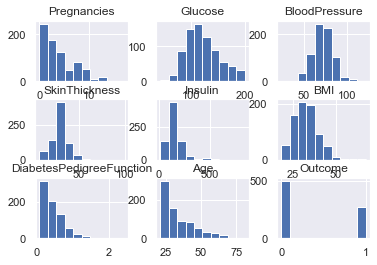

In [21]:
df.hist()
plt.show()

# 상관분석

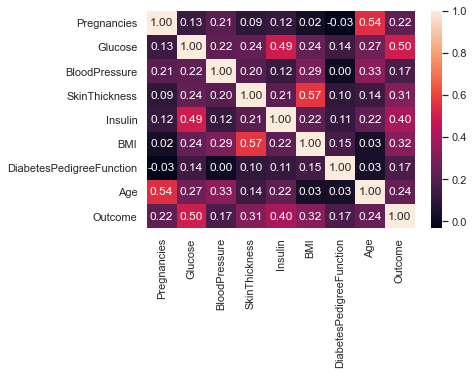

In [22]:
sns.heatmap(df.corr(), fmt=".2f", annot=True)
plt.show()

# Outlier는 train을 대상으로만 한다 
* train_test_split으로 df를 분리

In [23]:
#-------------------가공처리를 끝낸 DataFrame을 사용해 스케일링-----------------------------------
y = df['Outcome']
X = df.drop('Outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1414,shuffle=False)
#----------------------------------------------------------------------------------------------

In [24]:
X.shape, y.shape, X_train.shape, X_test.shape

((768, 9), (768,), (614, 9), (154, 9))

# 1차 점수 확인 : 이상치 제거

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcAqc6V%2FbtqyQLiddUd%2FiXQVu1nYTo2rx3Q8xZBqy0%2Fimg.png" width=400 height=400>

In [25]:
X_train[['Glucose','Insulin', 'Age']].describe()

,Glucose,Insulin,Age
count,614.000000,614.000000,614.000000
mean,121.440788,156.641748,33.197068
std,30.866709,91.279970,11.772805
min,44.000000,14.000000,21.000000
25%,99.000000,115.873239,24.000000
50%,116.500000,139.250000,29.000000
75%,141.000000,178.756098,40.000000
max,198.000000,846.000000,81.000000


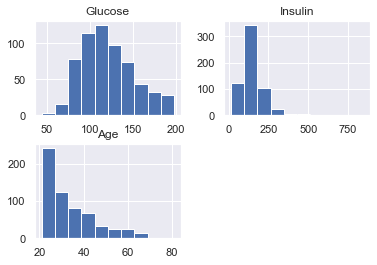

In [26]:
X_train[['Glucose','Insulin', 'Age']].hist()
plt.show()

count    131.000000
mean       4.687023
std        3.147854
min        1.000000
25%        2.000000
50%        4.000000
75%        6.500000
max       15.000000
Name: Glucose, dtype: float64


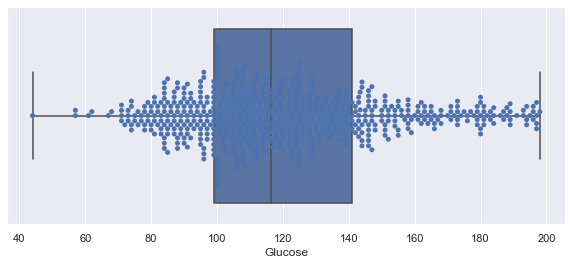

In [27]:
print(X_train['Glucose'].value_counts().describe())
f,ax=plt.subplots(figsize=(10,4))
sns.boxplot(x=X_train['Glucose'])
sns.swarmplot(x=X_train['Glucose'])
plt.show()

count    174.000000
mean       3.528736
std        8.096012
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       53.000000
Name: Insulin, dtype: float64


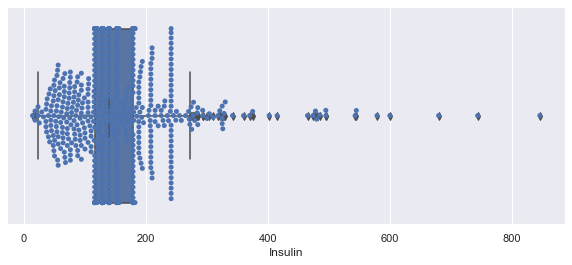

In [28]:
print(X_train['Insulin'].value_counts().describe())
f,ax=plt.subplots(figsize=(10,4))
sns.boxplot(x=X_train['Insulin'])
sns.swarmplot(x=X_train['Insulin'])
plt.show()

count    50.000000
mean     12.280000
std      12.834965
min       1.000000
25%       3.000000
50%       7.500000
75%      16.500000
max      53.000000
Name: Age, dtype: float64


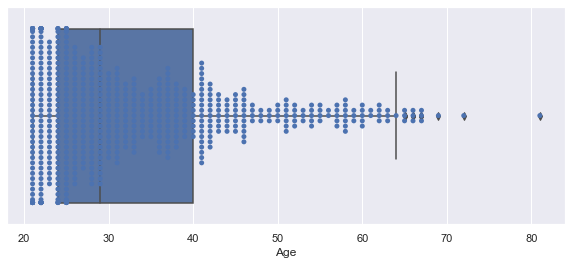

In [29]:
print(X_train['Age'].value_counts().describe())
f,ax=plt.subplots(figsize=(10,4))
sns.boxplot(x=X_train['Age'])
sns.swarmplot(x=X_train['Age'])
plt.show()

## 방법1 ) outlier 수식으로 찾기
* Glucose< 20 
* Insulin > 620
* Age > 80 

In [30]:
# s = pd.Series([1,2,3,4,5], name='col')
# s
# s.drop(index=3, inplace=True)
# s

In [31]:
Glucose_idx = X_train[ X_train['Glucose'] < 20 ].index.values   
Insulin_idx = X_train[ X_train['Insulin'] > 620 ].index.values   
Age_idx     = X_train[ X_train['Age'] > 80 ].index.values  

print(Glucose_idx, Insulin_idx, Age_idx)

[] [ 13 228 247] [459]


In [32]:
X_train.shape, X_test.shape

((614, 9), (154, 9))

In [33]:
for idx in Glucose_idx:
    X_train.drop(index=idx, inplace=True)
    y_train.drop(index=idx, inplace=True)

for idx in Insulin_idx:
    X_train.drop(index=idx, inplace=True)
    y_train.drop(index=idx, inplace=True)
    
X_train.drop(index=Age_idx, inplace=True)
y_train.drop(index=Age_idx, inplace=True)

In [34]:
X_train.shape, X_test.shape

((610, 9), (154, 9))

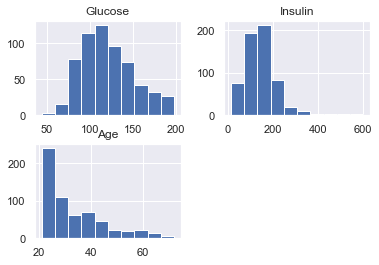

In [35]:
X_train[['Glucose','Insulin', 'Age']].hist()
plt.show()

In [36]:
fit_score(X_train, X_test, y_train, y_test, model)  

정확도0.8377 정밀도:0.7885 재현률:0.7455 f1:0.7664
오차행렬
 [[88 11]
 [14 41]]


## 방법2)  outlier IQR 범위로 찾기

In [ ]:
def my_detect_outliers(df, features, r=1.5): 
    dict = {}
    for col in features: 
        Q1 = np.percentile(df[col], 25) #2.5
        Q3 = np.percentile(df[col], 75) #7.5
        IQR = Q3 - Q1                   #5
        minimum = Q1 - (r * IQR)   #-5
        maximum = Q3 + (r * IQR)   #15
        idxs = df[  (df[col]<minimum) | (df[col]>maximum)  ].index 
        dict[col] = idxs
    return dict

In [ ]:
# #-------------------가공처리를 끝낸 DataFrame을 사용해 스케일링-----------------------------------
# y = df['Outcome']
# X = df.drop('Outcome', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1414,shuffle=False)
# #----------------------------------------------------------------------------------------------

In [ ]:
# res_dict = my_detect_outliers(X_train, ['Glucose','Insulin', 'Age'])
# print(res_dict)

In [ ]:
# for idx in res_dict['Glucose']:
#     X_train.drop(index=idx, inplace=True)
#     y_train.drop(index=idx, inplace=True)

# for idx in res_dict['Insulin']:
#     X_train.drop(index=idx, inplace=True)
#     y_train.drop(index=idx, inplace=True)


# for idx in res_dict['Age']:
#     X_train.drop(index=idx, inplace=True)
#     y_train.drop(index=idx, inplace=True)    

In [ ]:
# X_train[['Glucose','Insulin', 'Age']].hist()
# plt.show()

In [ ]:
# fit_score(X_train, X_test, y_train, y_test, model)  

# 2차 점수 확인 : 스케일링

### 스케일링 : 정규화, 단위맞추기

In [38]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [39]:
# mm = StandardScaler()
# mm.fit(문제지)                       #비율계산
# scaler_문제지 = mm.transform(문제지)  #계산반영해
# split_fit_score(scaler_문제지, 정답지, model)   #0.8441558441558441

scalers = [StandardScaler()]  #, RobustScaler(), MinMaxScaler()]
for mm in scalers:
    mm.fit(X_train)                       #비율계산
    scaler_X_train = mm.transform(X_train)  #계산반영해
    scaler_X_test = mm.transform(X_test)  #계산반영해
    
    print(mm.__class__.__name__)
    fit_score(scaler_X_train, scaler_X_test, y_train, y_test, model)   #0.8441558441558441    


StandardScaler
정확도0.8377 정밀도:0.7885 재현률:0.7455 f1:0.7664
오차행렬
 [[88 11]
 [14 41]]


# 3차 점수 확인 : 모델변경

### 모델 변경 : Boost 계열

In [40]:
import xgboost as xgb
# import lightgbm

In [41]:
xgmodel = xgb.XGBClassifier(n_estimators=300, objective="binary:logistic")   #logloss 
fit_score(scaler_X_train, scaler_X_test, y_train, y_test, xgmodel)   #0.8441558441558441   

[16:58:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도0.8506 정밀도:0.8200 재현률:0.7455 f1:0.7810
오차행렬
 [[90  9]
 [14 41]]


In [42]:
# !pip install xgboost
# !pip install lightgbm

# 4차 점수확인 : 검증
* 교차 검증(cross_val_score) : 데이터 N배 증강시켜 순차적 학습, (점수)
* 폴드(KFold, StratifiedKFold)  : 데이터 N배 증강시켜 순차적 학습, (점수,과정)
* 그리드서치(GridSearch)***   : 데이터 N배 증강시켜 순차적 학습,  (점수, 과정, 모델튜닝)

## <font color='red'>전체 데이터를 주자 </font>

In [43]:
arr1 = np.array([[1,2,3],[11,22,33],[111,222,333]]) #3*3
arr2 = np.array([[5,6,7],[55,66,77]])               #2*3
s1 = pd.Series([arr1])  #(1,0)
s2 = pd.Series([arr2])
ss = pd.concat([s1, s2], axis=0)
ss

# arr2 = np.array([4,5])
# arr = np.concatenate([arr1, arr2])
#      #pd.concat([df1, df2])
# arr

0    [[1, 2, 3], [11, 22, 33], [111, 222, 333]]
0                     [[5, 6, 7], [55, 66, 77]]
dtype: object

In [44]:
s1 = pd.Series(  np.array([1,2,3])  )
s2 = pd.Series(  np.array([4, 5])  )
s = pd.concat([s1, s2], axis=0, ignore_index=True)
s

0    1
1    2
2    3
3    4
4    5
dtype: int32

In [45]:
print(type(scaler_X_train), type(y_train))  # <class 'numpy.ndarray'> <class 'pandas.core.series.Series'>

scaler_X = np.concatenate([scaler_X_train, scaler_X_test])
y = pd.concat([y_train, y_test], axis=0, ignore_index=True)
print(scaler_X.shape, y.shape)

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
(764, 9) (764,)


### 폴드 KFold(), StratifiedKFold()

In [46]:
from sklearn.model_selection import KFold, StratifiedKFold

accuracy_total_score = []
f1_total_score = []
auc_total_score = []

# kfold = KFold(n_splits=5, random_state=1414, shuffle=True)
# for train_index, test_index in kfold.split(문제지):

skfold = StratifiedKFold(n_splits=5, random_state=1414, shuffle=True)
for train_index, test_index in skfold.split(scaler_X, y):
    문제지8, 문제지2 = scaler_X[train_index], scaler_X[test_index]
    정답지8, 정답지2 = y[train_index], y[test_index]
   #train_test_split(문제지,정답지, test_sizse=0.2, random_state=1414, shuffle=False) ----
    model.fit(문제지8, 정답지8)
    pred = model.predict(문제지2)
    proba = model.predict_proba(문제지2)
    
    accuracy = accuracy_score(정답지2, pred)
    f1 = f1_score(정답지2, pred)
    auc = roc_auc_score(정답지2, proba[:, 1])
    
    accuracy_total_score.append(accuracy)
    f1_total_score.append(f1)
    auc_total_score.append(auc)
    ####return np.array(total_score)

# print("평균", sum(accuracy_total_score) / len(accuracy_total_score))
print("평균 정확도 : ", np.array(accuracy_total_score).mean())  #평균 0.8658772599949071
print("평균 F1 :", np.array(f1_total_score).mean())  
print("평균 AUC :", np.array(auc_total_score).mean())  
 

평균 정확도 :  0.8664602683178535
평균 F1 : 0.8056355025593696
평균 AUC : 0.928837812083095


### cross_val_score()

In [47]:
from sklearn.model_selection import cross_val_score
#scores : ndarray  ::: 위와상동 == np.array(total_score)
total_score = cross_val_score(model, scaler_X, y, scoring='f1', cv=5)  #n_splits=cv=5
print(total_score)  #평균 0.8658772599949071
print("cross_val_score 평균:", total_score.mean())  #평균 0.867

[0.8        0.80769231 0.7961165  0.83809524 0.76923077]
cross_val_score 평균: 0.8022269639745367


### GridSearchCV()
#### <font color=red> [참고] XGBoost로 CV할 경우 : sklean의 estimator가 아니기 때문에 다음과 같이 사용 </font>  

* ref : https://rdrr.io/cran/xgboost/man/xgb.cv.html
* 2020.09.27 기준 : https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/

In [60]:
dmatrix_df = xgb.DMatrix(data=scaler_X, label=y, enable_categorical=True)
xgb_cv_res = xgb.cv(dtrain=dmatrix_df, 
               params={"n_estimators": 100, "objective":"binary:logistic"}, 
               nfold=5, 
               metrics="auc",        #--- 이진분류 점수 중 하나 
               as_pandas=True)
xgb_cv_res['train-auc-mean'].mean()  #------------ 이거 accuracy 점수 아님......

[17:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used

0.9863331799999999

# 5차 점수확인 : 임계치 조정을 통한  f1_score() 올리기

### confusion_matrix 
* ref : https://www.medcalc.org/manual/roc-curves.php
| | |
|:-|:-|
|TN|FP|
|FN|TP|

| | | |
|-|:-|:-|
|정확도|$accuracy=\frac{TN+TP}{TP+FP+FP+FN}$|전체 샘플 중 맞게 예측한 비율|
|정밀도|$precision=\frac{TP}{TP+FP}$|True로 예측한것 중 실제 True인 비율|
|재현률|$recall=\frac{TP}{FN+FP}$|실제 True 중 예측이 True인 비율|
|F1|$f1=2*\frac{precision * recall}{precision + recall}$|정밀도 재현율 조화 평균|

* 재현율(recall) 점수 올리기
<pre>
th:2  --> th:1     [임계치를 낮추면]
[0 1 1]-->[1 1 1]  즉 양성 데이터가 늘었다 --> 24수치를 줄인다
*
[[86 13] <br>
 [24 31]]
</pre>

In [59]:
# proba = model.predict_proba(scaler_X_test)   #이미 학습에서 사용된 데이터 100점...공모전의 테스트데이터를 넣어라..
# th_list = [0.4,  0.5, 0.6]
# for th in th_list:
#     binz = Binarizer(threshold=th)                              # [[.7 .3] [.4  .6]]   th:0.2
#     pred_binz = binz.fit_transform(proba[:, 1].reshape(-1,1))   # [  th<.3] [  th<.6]]  --> [1 1]
#     f1 = f1_score(y_test, pred_binz)
#     #my_eval(y_test, pred_binz, proba, th)        

#     print(f1)    

In [50]:
# 임계치 : 0.35 기준 
# f1:0.6780
# accuracy : 0.7532 

## 6차 점수확인: 앙상블 & 스태킹